# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
!pip install plotly --upgrade



   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 5.7 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 19.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 21.2 MB/s  0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [158]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [159]:
# Preparação - Tratando os Dados:

print('Verificação inicial: ')
print(df.head().to_string()) # Cabeçalho
print(df.tail().to_string()) # Final da tabela
print(df.info) #mostra quantidade de colunas e linhas
print(df.dtypes) # mostra o tipo de coluna

Verificação inicial: 
                                             title       Marca  Preco_Normal  Preco_Desconto  Preco_Anterior  Desconto Categoria
0             Pack 12 un, Leche extra proteína 1 L  Loncoleche         19788               0               0         0   lacteos
1  Pack 12 un, Leche chocolate receta original 1 L     Soprole         18228               0               0         0   lacteos
2   Pack 12 un, Leche semidescremada chocolate 1 L     Soprole         18228               0               0         0   lacteos
3    Pack 12 un, Leche semidescremada frutilla 1 L     Soprole         18228               0               0         0   lacteos
4      Pack 12 un, Leche sin lactosa chocolate 1 L  Loncoleche         17988               0               0         0   lacteos
                                                 title    Marca  Preco_Normal  Preco_Desconto  Preco_Anterior  Desconto                   Categoria
1102                  Helado bresler pote cassata 2,4l  

In [160]:


df['Preco_R$'] = df['Preco_Normal']/100

# Extrair unidades do texto (se houver "Pack X un")
df['Unidades'] = df['title'].str.extract(r'Pack (\d+) un').astype(float)

# Preencher com 1 onde não houver "Pack"
df['Unidades'] = df['Unidades'].fillna(1).astype(int)

# Preços zerados e NAN
df = df[(df['Preco_R$'] != 0) & (df['Preco_R$'].notna())]
print(df.dtypes)
# Preço Unitário
df['Preco_Unitario'] = df['Preco_R$']/df['Unidades']


# Analise de Nulos
print('Analise de Nulos: \n', df.isnull().sum())
print('Analise de Nulos %: \n', df.isnull().mean()*100)
print(df.head().to_string()) # Cabeçalho
print(df.tail().to_string()) # Final da tabela
print(df.info) #mostra quantidade de colunas e linhas


title              object
Marca              object
Preco_Normal        int64
Preco_Desconto      int64
Preco_Anterior      int64
Desconto            int64
Categoria          object
Preco_R$          float64
Unidades            int64
dtype: object
Analise de Nulos: 
 title             0
Marca             0
Preco_Normal      0
Preco_Desconto    0
Preco_Anterior    0
Desconto          0
Categoria         0
Preco_R$          0
Unidades          0
Preco_Unitario    0
dtype: int64
Analise de Nulos %: 
 title             0.0
Marca             0.0
Preco_Normal      0.0
Preco_Desconto    0.0
Preco_Anterior    0.0
Desconto          0.0
Categoria         0.0
Preco_R$          0.0
Unidades          0.0
Preco_Unitario    0.0
dtype: float64
                                             title       Marca  Preco_Normal  Preco_Desconto  Preco_Anterior  Desconto Categoria  Preco_R$  Unidades  Preco_Unitario
0             Pack 12 un, Leche extra proteína 1 L  Loncoleche         19788               0     

In [152]:
# Tipo de dados unicos e Estatistica
print('Análise de Dados Únicos: \n', df.nunique())
print('Estatísticas: \n', df.describe())

Análise de Dados Únicos: 
 title              781
Marca              127
Preco_Normal       360
Preco_Desconto       1
Preco_Anterior       1
Desconto             1
Categoria            7
Preco_Normal_R$    360
Unidades             7
Preço_Unitario     349
Preco_R$           360
Preco_Unitario     349
dtype: int64
Estatísticas: 
        Preco_Normal  Preco_Desconto  Preco_Anterior  Desconto  \
count    813.000000           813.0           813.0     813.0   
mean    2819.918819             0.0             0.0       0.0   
std     3135.210940             0.0             0.0       0.0   
min      209.000000             0.0             0.0       0.0   
25%      990.000000             0.0             0.0       0.0   
50%     1890.000000             0.0             0.0       0.0   
75%     3290.000000             0.0             0.0       0.0   
max    19788.000000             0.0             0.0       0.0   

       Preco_Normal_R$    Unidades  Preço_Unitario    Preco_R$  Preco_Unitario  
c

In [161]:
# Descobrindo todas as Categorias para fazer a media por produto
categorias_unicas = df['Categoria'].unique()
print('categorias_unicas', categorias_unicas)

#['lacteos' 'belleza-y-cuidado-personal' 'congelados' 'frutas'
# 'comidas-preparadas' 'verduras' 'instantaneos-y-sopas']



categorias_unicas ['lacteos' 'belleza-y-cuidado-personal' 'congelados' 'frutas'
 'comidas-preparadas' 'verduras' 'instantaneos-y-sopas']


In [162]:
#Seu código aqui para a média
# Descobrindo quantos produtos temos por categoria
df.groupby('Categoria')['title'].count().reset_index().sort_values(by='title', ascending=False)

,Categoria,title
5,lacteos,352
2,congelados,164
0,belleza-y-cuidado-personal,146
6,verduras,59
4,instantaneos-y-sopas,37
1,comidas-preparadas,36
3,frutas,19


In [164]:
# Média
print('Análise de Dados Únicos: \n', df.nunique())
df.columns = df.columns.str.strip()
df.groupby('Categoria').agg({'Preco_Unitario': 'mean','Preco_R$': 'mean', }).round(2)



Análise de Dados Únicos: 
 title             781
Marca             127
Preco_Normal      360
Preco_Desconto      1
Preco_Anterior      1
Desconto            1
Categoria           7
Preco_R$          360
Unidades            7
Preco_Unitario    349
dtype: int64


,Preco_Unitario,Preco_R$
Categoria,,
belleza-y-cuidado-personal,28.84,29.20
comidas-preparadas,39.55,39.55
congelados,30.21,30.21
frutas,17.24,17.24
instantaneos-y-sopas,11.79,11.79
lacteos,15.13,30.29
verduras,14.57,14.57


Média comparando Produtos por Categoria. Observe que a comparação entre valores acima mostra que não tem muitos Packs que agrupavam o valor dos produtos. 
Apenas em Lacteos e belleza-y-cuidado-personal	 

In [165]:
#Mediana
df.groupby('Categoria').agg({'Preco_Unitario': 'median','Preco_R$': 'median', }).round(2)

,Preco_Unitario,Preco_R$
Categoria,,
belleza-y-cuidado-personal,20.99,21.79
comidas-preparadas,37.40,37.40
congelados,29.54,29.54
frutas,11.95,11.95
instantaneos-y-sopas,6.89,6.89
lacteos,9.89,17.20
verduras,12.50,12.50


Digite aqui as categorias:

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [166]:
# Desvio Padrão
df.groupby('Categoria').agg({'Preco_Unitario': 'std','Preco_R$': 'std', }).round(2)

,Preco_Unitario,Preco_R$
Categoria,,
belleza-y-cuidado-personal,21.67,21.63
comidas-preparadas,13.22,13.22
congelados,19.04,19.04
frutas,16.39,16.39
instantaneos-y-sopas,12.76,12.76
lacteos,17.82,41.99
verduras,9.72,9.72


Observações:
Comparativo Preco_ Normal_R$ e Preço_Unitario

Impactos considerável em Produtos Lacteos seguido de leve alteração em  belleza-y-cuidado-personal

**Média:** 
Estão naturalmente altas pois diluiram valores maiores (Packs) com menores.

**Mediana:** 
A categoria belleza-y-cuidado-personal paresentam uma mediana e desvio padrão próximos(mediana: 21.79, std: 21.63).
Isso que dizer que os valores estão bem distribuidos e tem pouco ou nenhum outiliers.

**Desvio Padrão:** Os numeros que se aproximam da mediana representam dados bem distribuidos proximos da mediana.
Já os dados que estão relativamente longe da mediana estão dispersos. Isso quer dizer que os preços variam bastante
ou seja, não estão todos próximos do valor central.

  
Contagem após a limpeza: 813.000000

Média de todos os Produtos: 

Preco_ Normal_R$ : 28.199188 

Preço_Unitario:    21.572302  

Desvio Padrão:

Preco_ Normal_R$ todos : 31.352109   

Preço_Unitario todos:    21.572302


Por Categorias-Preço_Unitario

belleza-y-cuidado-personal  Media:	28.84, Mediana: 20.99, std: 21.67

comidas-preparadas	        Média:  39.55, Mediana: 37.40, std: 13.22

congelados	                Média:  30.21, Mediana: 29.54, std: 19.04

frutas	                    Média:  17.24, Mediana: 11.95, std: 16.39

instantaneos-y-sopas	    Média:  11.79, Mediana: 6.89,  std: 12.76

lacteos	                    Média:**15.13, Mediana: 9.89,  std: 17.82**

verduras	                Média:  14.57, Mediana: 12.50, std: 9.72

Por Categorias-Preco_ Normal_R$

belleza-y-cuidado-personal  Media:	29.20, Mediana: 21.79, std: 21.63

comidas-preparadas	        Média:  39.55, Mediana: 37.40, std: 13.22

congelados	                Média:  30.21, Mediana: 29.54, std: 19.04

frutas	                    Média:  17.24, Mediana: 11.95, std: 16.39

instantaneos-y-sopas	    Média:  11.79, Mediana: 6.89,  std: 12.76

lacteos	                    Média:**30.29, Mediana: 17.20, std: 41.99**

verduras	                Média:  14.57, Mediana: 12.50, std: 9.72




# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

In [1]:
# Filtrar apenas os produtos da categoria 'Lacteos'

df.loc[df['Categoria'] == 'lacteos']

# Criar o boxplot com os preços normais dos produtos lácteos
plt.figure(figsize=(8, 6))
plt.boxplot(lacteos_df['Preco_R$'])
plt.title('Boxplot - Categoria Lácteos', fontsize=16)
plt.ylabel('Preço (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

NameError: name 'df' is not defined

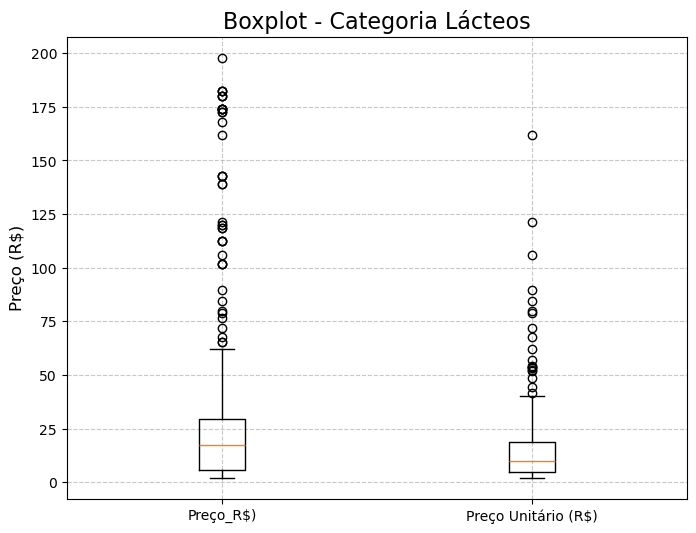

In [177]:
# Limpar nomes de colunas
df.columns = df.columns.str.strip()

# Filtrar apenas produtos da categoria 'Lacteos'
lacteos_df = df[df['Categoria'].str.lower().str.strip() == 'lacteos']

# Criar o boxplot com Preço Normal e Preço Unitário
plt.figure(figsize=(8, 6))
plt.boxplot([
    lacteos_df['Preco_R$'].dropna(),
    lacteos_df['Preco_Unitario'].dropna()
])

# Rótulos e título
plt.xticks([1, 2], ['Preço_R$)', 'Preço Unitário (R$)'])
plt.title('Boxplot - Categoria Lácteos', fontsize=16)
plt.ylabel('Preço (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

Análise de Dados Únicos: 
 title             781
Marca             127
Preco_Normal      360
Preco_Desconto    731
Preco_Anterior      1
Desconto            1
Categoria           7
Preco_R$          360
Unidades            7
Preco_Unitario    349
Desconto_%        546
dtype: int64


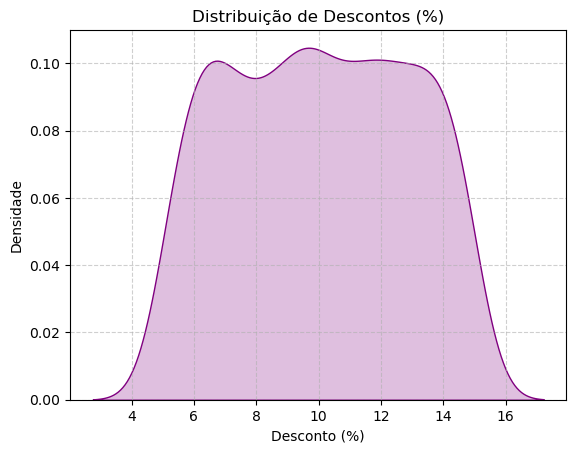

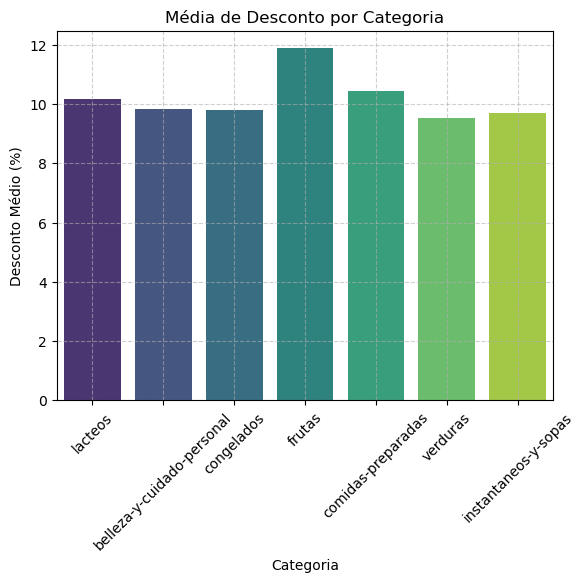

In [188]:
#import numpy as np
# Criar coluna com descontos aleatórios entre 5% e 15%
df['Desconto_%'] = np.random.uniform(5, 15, size=len(df)).round(2)

# Aplicar o desconto sobre o Preço Normal
df['Preco_Desconto'] = (df['Preco_R$'] * (1 - df['Desconto_%'] / 100)).round(2)

print('Análise de Dados Únicos: \n', df.nunique())
df.groupby('Categoria')['Preco_Desconto'].mean().round(2)


media = df['Desconto_%'].mean()

sns.kdeplot(df['Desconto_%'], fill=True, color='purple')
plt.title('Distribuição de Descontos (%)')
plt.xlabel('Desconto (%)')
plt.ylabel('Densidade')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Gráfico de barras com média de desconto por categoria
sns.barplot(data=df, x='Categoria', y='Desconto_%', estimator='mean', errorbar=None, hue='Categoria', legend=False, palette='viridis')
plt.title('Média de Desconto por Categoria')
plt.ylabel('Desconto Médio (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

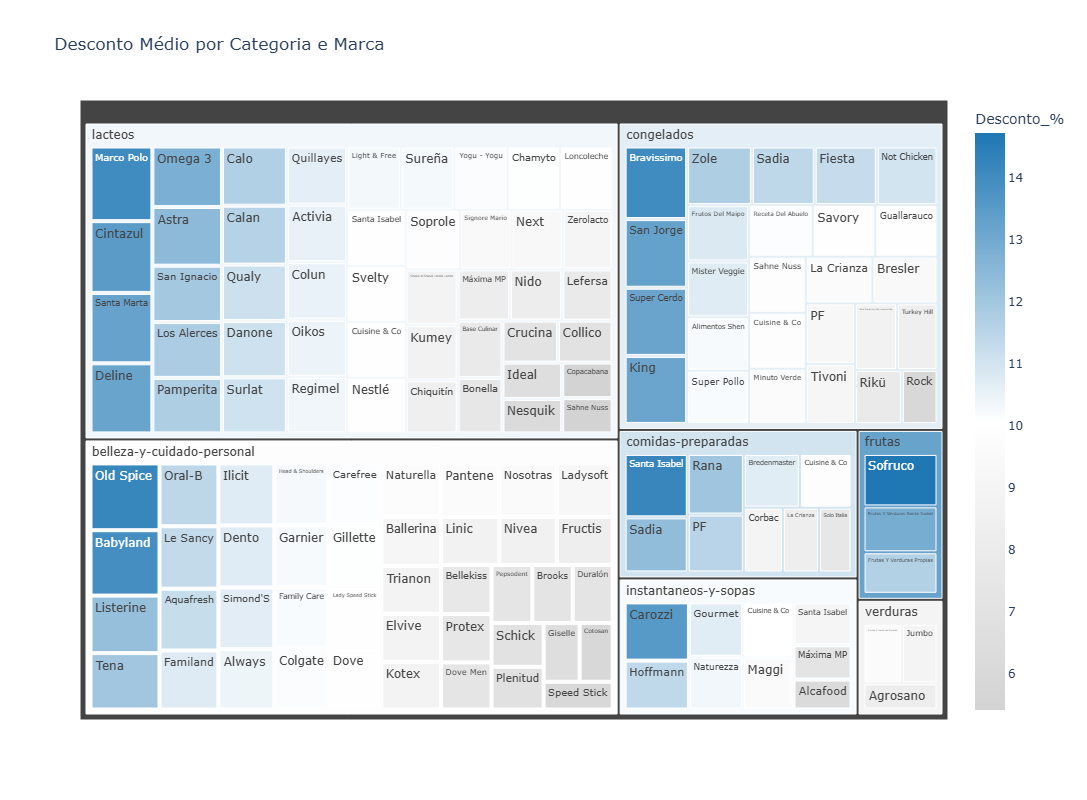

In [197]:
# Agrupando os dados
desconto_por_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto_%'].mean().reset_index()

# Criando o treemap com escala de cor personalizada
fig = px.treemap(
    desconto_por_categoria_marca,
    path=['Categoria', 'Marca'],
    values='Desconto_%',
    color='Desconto_%',
    title='Desconto Médio por Categoria e Marca',
    color_continuous_scale=[
        '#d3d3d3',  # Cinza claro (pouco desconto)
        '#ffffff',  # Branco (desconto médio)
        '#1f77b4'   # Azul escuro (muito desconto)
    ],
    height=800  # Aumenta a altura do gráfico (pode ajustar para 600, 1000, etc.)
)


fig.show()

# fig.write_html("treemap_interativo.html")
# fig.write_image("treemap_desconto.pdf")
# fig.write_image("treemap_desconto.png")

